In [2]:
import numpy as np
import pandas as pd

import os

### Time consumption for each cases

In [3]:
# # Straight Road
# data_folder = '../data/routes_short_2023-05-05|22:07:50/'

# Curve Road
data_folder = '../data/routes_short_2023-05-12|17:04:09/'

image_folders = []
for sub_folder in os.listdir(data_folder):
    if not sub_folder.endswith('.csv'): 
        image_folders.append(data_folder+sub_folder)
image_folders.sort()
image_folders = image_folders[:-1]
len(image_folders), image_folders[0]

(809, '../data/routes_short_2023-05-12|17:04:09/routes_short_05_12_17_04_19')

In [4]:
number_of_frames = []
tuple_frame_file = []
for image_folder in image_folders:
    number_of_frames.append(len(os.listdir(image_folder+"/bev")))
    tuple_frame_file.append((len(os.listdir(image_folder+"/bev")), image_folder+"/bev"))

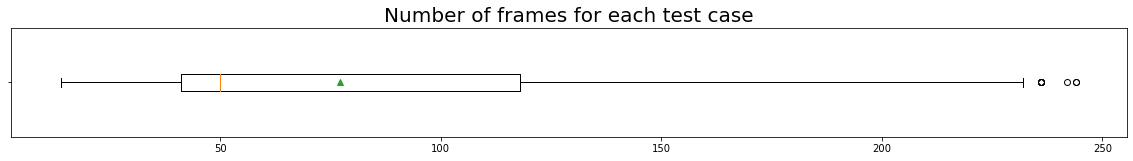

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,2))
plt.boxplot(number_of_frames, labels=[''], vert=False, showmeans=True)
plt.title("Number of frames for each test case", fontsize=20)
plt.show()

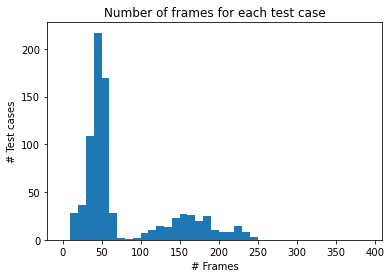

array([  0.,  28.,  36., 109., 217., 170.,  28.,   2.,   1.,   2.,   7.,
        10.,  14.,  13.,  23.,  27.,  26.,  20.,  25.,  10.,   8.,   8.,
        14.,   8.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

In [41]:
bins = plt.hist(number_of_frames, bins=range(0,400,10))
plt.title("Number of frames for each test case")
plt.ylabel('# Test cases')
plt.xlabel('# Frames')
plt.show()
bins[0]

### Fitness score and number

(809, 14)


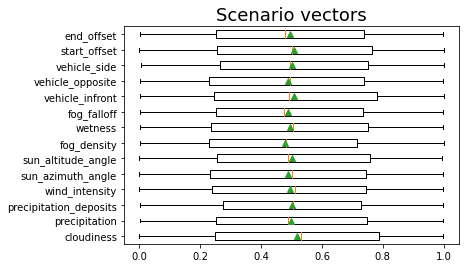

In [7]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]
scenarios = pd.read_csv(data_folder+'scenario.csv',names=scenario_header)
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

(809, 5)


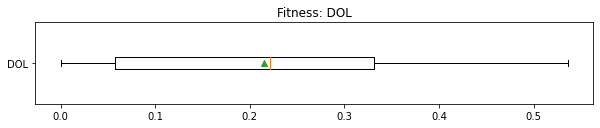

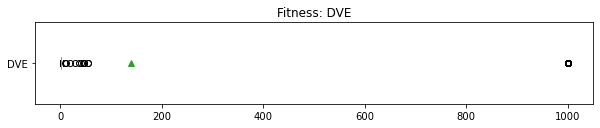

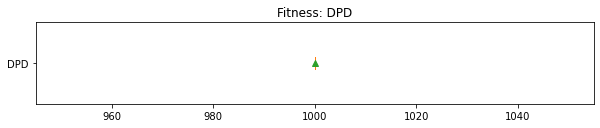

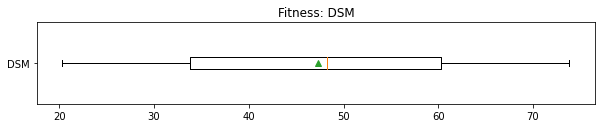

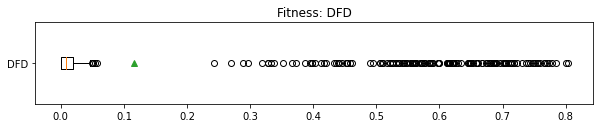

In [8]:
fitness_header = ["DOL","DVE","DPD","DSM","DFD"]
fitnesses = pd.read_csv(data_folder+'fitness.csv',names=fitness_header)
print(fitnesses.shape)
        
for fitness_label in fitness_header:
    plt.figure(figsize=(10,1.5))
    plt.boxplot(fitnesses[fitness_label], labels=[fitness_label], vert=False, showmeans=True)
    plt.title('Fitness: '+fitness_label)
    plt.show()

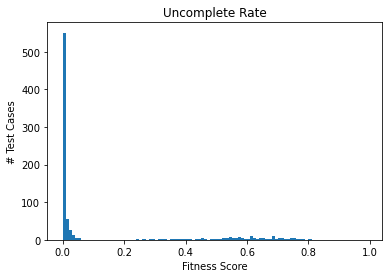

In [45]:
bins = plt.hist(fitnesses['DFD'], bins=np.arange(0,1,0.01))
plt.title('Uncomplete Rate')
plt.xlabel('Fitness Score')
plt.ylabel('# Test Cases')
plt.show()

In [67]:
DVE_score = fitnesses['DVE'].to_numpy()
DVE_score = DVE_score/5
DVE_score[DVE_score>1] = 0.9999

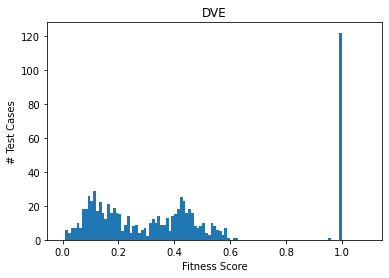

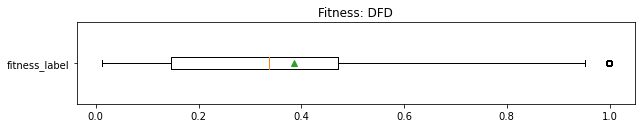

In [70]:
bins = plt.hist(DVE_score, bins=np.arange(0,1.1,0.01))
plt.title('DVE')
plt.xlabel('Fitness Score')
plt.ylabel('# Test Cases')
plt.show()

        
plt.figure(figsize=(10,1.5))
plt.boxplot(DVE_score, labels=['fitness_label'], vert=False, showmeans=True)
plt.title('Fitness: '+fitness_label)
plt.show()

In [9]:
criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]
criterions = pd.read_csv(data_folder+'criterion-replace.csv',names=criterion_header)
print(criterions.shape)

(809, 15)


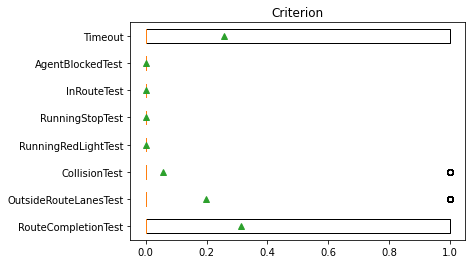

In [10]:
criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        "RunningRedLightTest",   
                        "RunningStopTest",       
                        "InRouteTest", 
                        "AgentBlockedTest",
                        "Timeout"]
# plt.figure(figsize=(10,1.5))
plt.boxplot(criterions[criterion_bool_head], labels=criterion_bool_head, vert=False, showmeans=True)
plt.title('Criterion')
plt.show()

In [74]:
criterions[criterion_bool_head][criterions[criterion_bool_head].sum(axis=1) == 3]

,RouteCompletionTest,OutsideRouteLanesTest,CollisionTest,RunningRedLightTest,RunningStopTest,InRouteTest,AgentBlockedTest,Timeout
3,1,1,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1
16,1,1,1,0,0,0,0,0
27,1,1,1,0,0,0,0,0
28,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
770,1,1,0,0,0,0,0,1
772,1,1,0,0,0,0,0,1
778,1,1,1,0,0,0,0,0
786,1,1,1,0,0,0,0,0


In [11]:
(criterions[criterion_bool_head] == 1).sum()

RouteCompletionTest      253
OutsideRouteLanesTest    161
CollisionTest             46
RunningRedLightTest        0
RunningStopTest            0
InRouteTest                0
AgentBlockedTest           0
Timeout                  207
dtype: int64

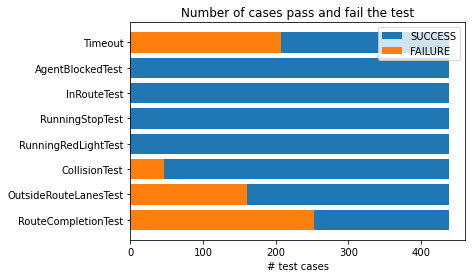

In [12]:
import matplotlib.pyplot as plt

plt.barh(criterion_bool_head, [439]*8)
plt.barh(criterion_bool_head, (criterions[criterion_bool_head] == 1).sum())
plt.legend(['SUCCESS','FAILURE'])
plt.title('Number of cases pass and fail the test')
plt.xlabel('# test cases')
plt.show()

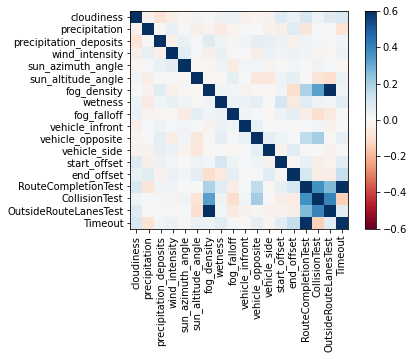

In [30]:
scenario_criterion = pd.concat([scenarios, criterions[["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"]]],axis=1)

plt.imshow(scenario_criterion.corr().to_numpy(), cmap='RdBu', vmin=-0.6, vmax=0.6)
plt.yticks(range(18),scenario_criterion.columns.tolist())
plt.xticks(range(18),scenario_criterion.columns.tolist(),rotation=90)
plt.colorbar()
plt.show()

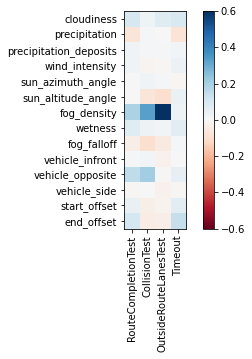

In [24]:
scenario_criterion = pd.concat([scenarios, criterions[["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"]]],axis=1)

plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.6, vmax=0.6)
plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()
# Positive means easy to cause failure

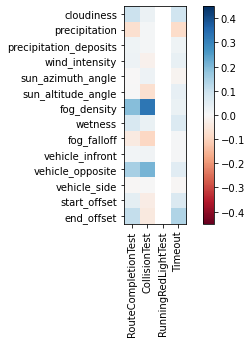

In [13]:
scenario_criterion = pd.concat([scenarios, criterions[["RouteCompletionTest", "CollisionTest", "RunningRedLightTest", "Timeout"]]],axis=1)

plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-.45, vmax=.45)
plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()
# Positive means easy to cause failure

In [25]:
importance = []
for i, name in enumerate(scenario_criterion.columns.tolist()[:14]):
    importance.append((sum(scenario_criterion.corr().to_numpy()[:14, 14:18][i]**2)**0.5, name))
importance.sort()
importance

[(0.028347764167010896, 'sun_azimuth_angle'),
 (0.028421690766130374, 'vehicle_side'),
 (0.02893716389748272, 'precipitation_deposits'),
 (0.03252011690419109, 'vehicle_infront'),
 (0.04510878497502517, 'wind_intensity'),
 (0.08982390790707753, 'start_offset'),
 (0.1011721248188502, 'wetness'),
 (0.10869036280037098, 'precipitation'),
 (0.11566267650763158, 'fog_falloff'),
 (0.12456960539562766, 'sun_altitude_angle'),
 (0.15412405915766697, 'cloudiness'),
 (0.18249667041593637, 'end_offset'),
 (0.26125781123554737, 'vehicle_opposite'),
 (0.7186439201363806, 'fog_density')]

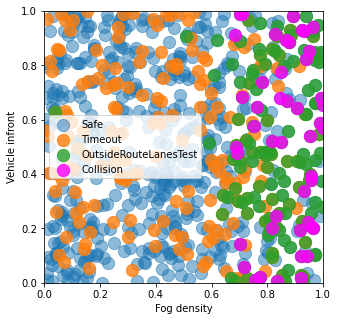

In [27]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt


X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
pca = PCA(n_components=2)
# pca = PCA()
pca.fit(X)

colors = ['tab:orange', 'tab:green', 'magenta']

s=150 

# Plot
plt.figure(figsize=(5,5))
plt.scatter(scenario_criterion['fog_density'][scenario_criterion['Timeout'] == 0], 
            scenario_criterion['vehicle_infront'][(scenario_criterion['Timeout'] == 0)],
            c = 'tab:blue', s=s, alpha=0.5)
plt.xlim((0,1))
plt.ylim((0,1))

for i, certion_label in enumerate(['Timeout','OutsideRouteLanesTest','CollisionTest']):
    plt.scatter(scenario_criterion['fog_density'][(scenario_criterion[certion_label] == 1)], 
                scenario_criterion['vehicle_infront'][(scenario_criterion[certion_label] == 1)],
                c = colors[i], s=s, alpha=0.8)

plt.legend(['Safe','Timeout','OutsideRouteLanesTest','Collision'])

plt.xlabel('Fog density')
plt.ylabel('Vehicle infront')


plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

seed = 42

max_f1_sum = 0
for i in range(1,11,2):
    print("max_depth:",i)
    print("                    | Train F1 | Test F1")
    print("----------------------------------------")
    f1_sum = 0
    for certion_label in ["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"]:
        X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
        y = scenario_criterion[certion_label].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)


        clf = RandomForestClassifier(max_depth=i, random_state=seed, class_weight={0:sum(y==1)/len(y), 1:sum(y==0)/len(y)})
        # clf = LogisticRegression(random_state=seed)
        clf.fit(X_train, y_train)

        acc = sum(clf.predict(X_test)==y_test)/len(y_test)
        print("{:>19} | {:0<7}  | {:0<7}".format(
            certion_label,
            round(f1_score(clf.predict(X_train), y_train), 5), 
            round(f1_score(clf.predict(X_test), y_test), 5)
        ))

        # print(clf.predict(X_test))
        f1_sum += f1_score(clf.predict(X_test), y_test)
    print()
    print()


max_depth: 1
                    | Train F1 | Test F1
----------------------------------------
RouteCompletionTest | 0.65816  | 0.53039
      CollisionTest | 0.52174  | 0.39216
OutsideRouteLanesTest | 0.77966  | 0.71429
            Timeout | 0.52321  | 0.47934


max_depth: 3
                    | Train F1 | Test F1
----------------------------------------
RouteCompletionTest | 0.75964  | 0.55629
      CollisionTest | 0.64286  | 0.48780
OutsideRouteLanesTest | 0.79725  | 0.72072
            Timeout | 0.71595  | 0.44643


max_depth: 5
                    | Train F1 | Test F1
----------------------------------------
RouteCompletionTest | 0.84685  | 0.55474
      CollisionTest | 0.74227  | 0.57143
OutsideRouteLanesTest | 0.87407  | 0.74286
            Timeout | 0.88462  | 0.40404


max_depth: 7
                    | Train F1 | Test F1
----------------------------------------
RouteCompletionTest | 0.95627  | 0.56716
      CollisionTest | 0.91139  | 0.52174
OutsideRouteLanesTest | 0.98745  |

In [24]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(14, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [25]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)